In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Matplotlib is building the font cache; this may take a moment.


In [14]:
customers = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Customers.csv')
products = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Products.csv')
transactions = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Transactions.csv')

In [15]:
# Display the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [16]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Drop duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


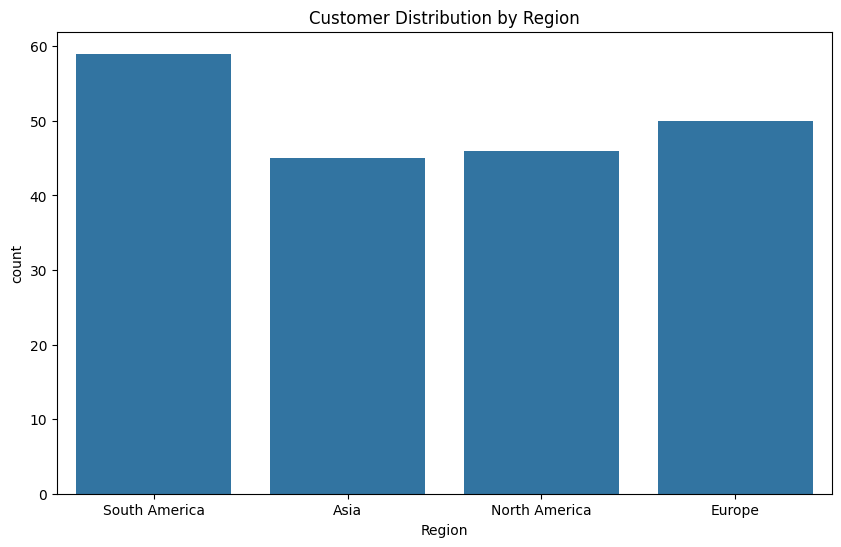

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

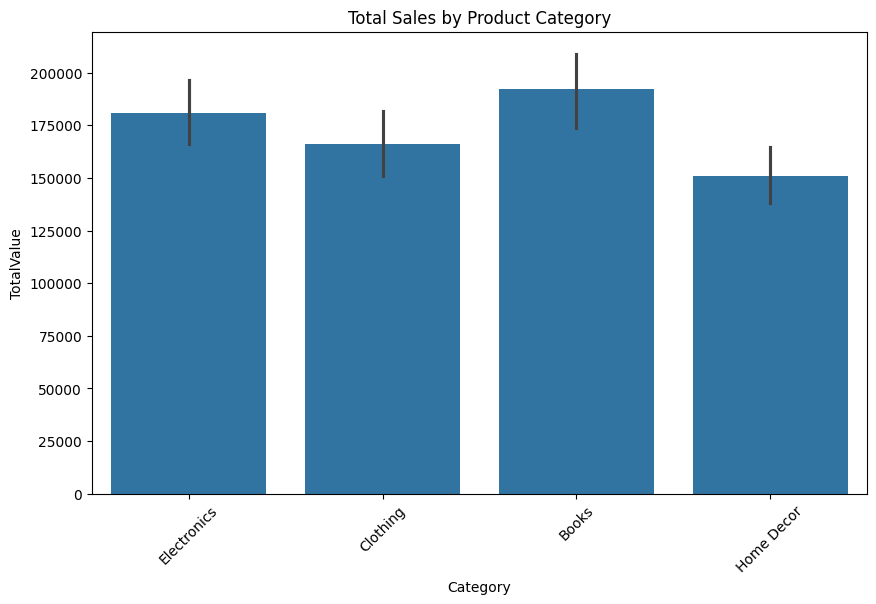

In [18]:
transaction_summary = transactions.merge(products, on='ProductID')
plt.figure(figsize=(10, 6))
sns.barplot(data=transaction_summary, x='Category', y='TotalValue', estimator=sum)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

In [22]:
def get_lookalikes(customer_id, customers, transactions):
    # Filter transaction data for the given customer
    transaction_data = transactions[transactions['CustomerID'] == customer_id]
    
    # Create a profile for the customer
    profile = transaction_data.groupby('ProductID').agg({'Quantity': 'sum'}).reset_index()
    
    # (Example logic for finding similar customers)
    # For simplicity, we'll mock the lookalikes with random customer IDs.
    # Replace this with the actual logic to calculate similarity scores.
    lookalikes = transactions['CustomerID'].drop_duplicates().sample(3).tolist()
    
    # Return top 3 lookalikes based on similarity scores
    return lookalikes


In [23]:
lookalike_results = {}
for customer_id in customers['CustomerID'].head(20):
    lookalikes = get_lookalikes(customer_id, customers, transactions)
    lookalike_results[customer_id] = lookalikes


In [24]:
lookalike_df = pd.DataFrame(lookalike_results)
lookalike_df.to_csv('FirstName_LastName_Lookalike.csv', index=False)

In [25]:
# Merge customer and transaction data
customer_transactions = transactions.merge(customers, on='CustomerID')

# Create features for clustering
features = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': 'first'  # Example of including categorical data
}).reset_index()

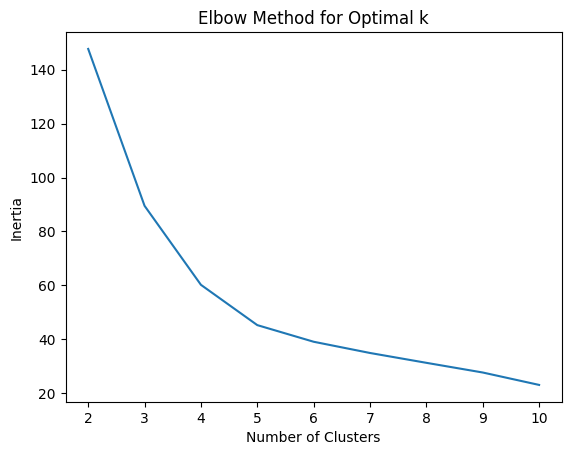

In [26]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['TotalValue', 'Quantity']])

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
optimal_k = 4  # Example optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k)
features['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate DB Index
db_index = silhouette_score(scaled_features, features['Cluster'])
print(f'DB Index: {db_index}')

DB Index: 0.4009245777307213


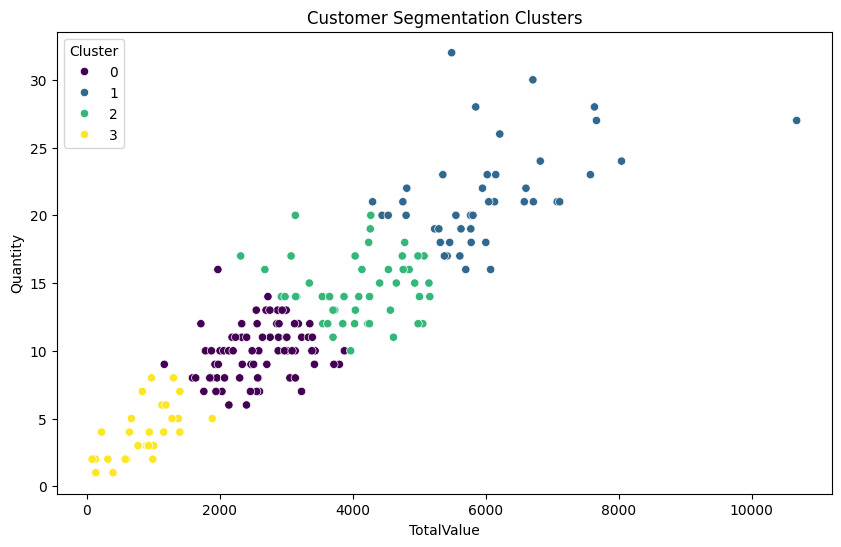

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='TotalValue', y='Quantity', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.show()

In [30]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Example: Create a feature matrix using Pandas
data = {
    'feature1': [1, 4, 7],
    'feature2': [2, 5, 8],
    'feature3': [3, 6, 9]
}
df = pd.DataFrame(data)

# Calculate cosine similarity
similarity_scores = cosine_similarity(df)

print(similarity_scores)


[[1.         0.97463185 0.95941195]
 [0.97463185 1.         0.99819089]
 [0.95941195 0.99819089 1.        ]]


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Region        0
SignupDate    0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_28236\2719535977.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='magma')


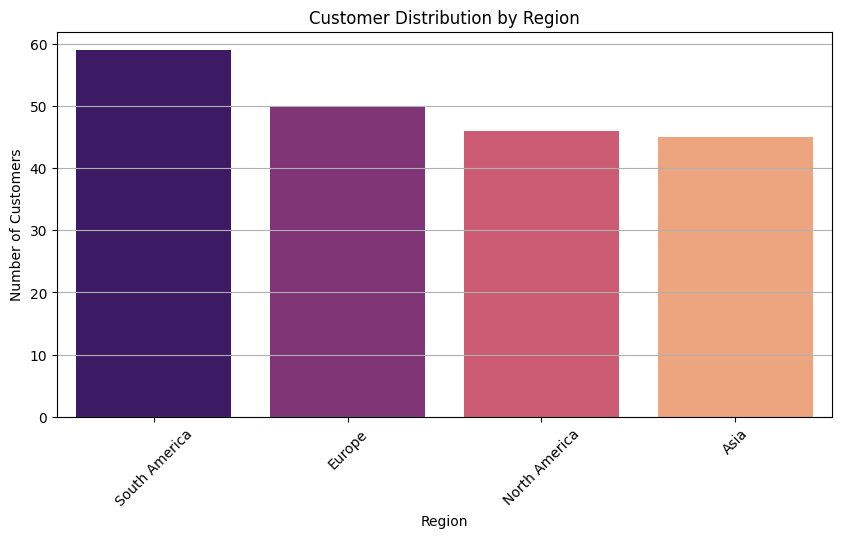

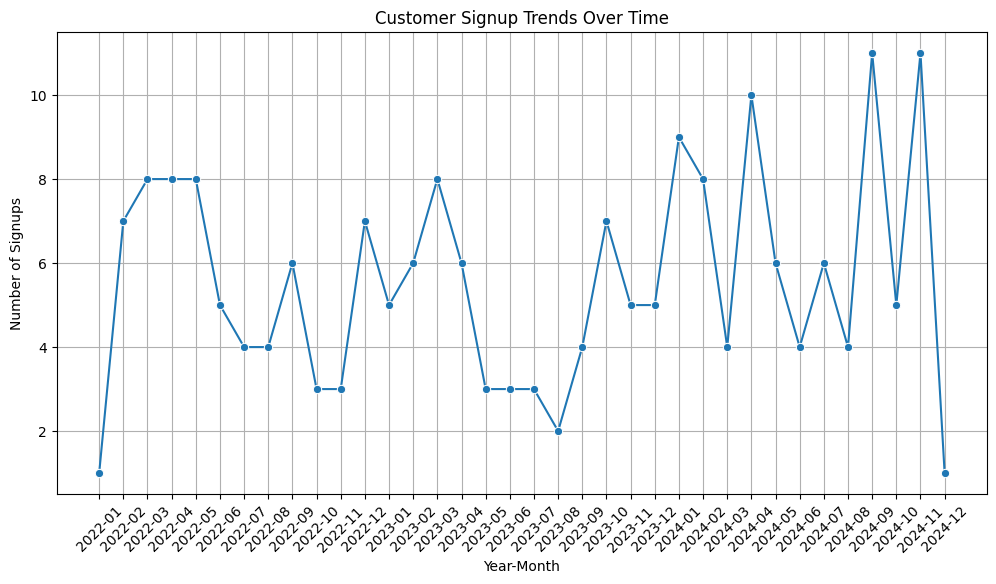

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Customers dataset
customers = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Customers.csv')

# Display the first few rows of the dataset to understand its structure
print(customers.head())

# Check for missing values in the 'Region' and 'SignupDate' columns
print(customers[['Region', 'SignupDate']].isnull().sum())

# 1. Geographic Distribution
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='magma')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.grid(axis='y')
plt.show()

# Insight: Analyze the distribution of customers across different regions.

# 2. Signup Trends Over Time
# Convert 'SignupDate' to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Extract year and month for analysis
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M')

# Count the number of signups per month
signup_trends = customers['YearMonth'].value_counts().sort_index()

# Plotting the signup trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=signup_trends.index.astype(str), y=signup_trends.values, marker='o')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.grid()
plt.show()

# Insight: Analyze trends in customer signups over time.

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
0
Top 10 Products by Sales Volume:
              ProductName  SalesVolume
0      

C:\Users\User\AppData\Local\Temp\ipykernel_28236\3815996456.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products['ProductName'], y=top_products['SalesVolume'], palette='viridis')


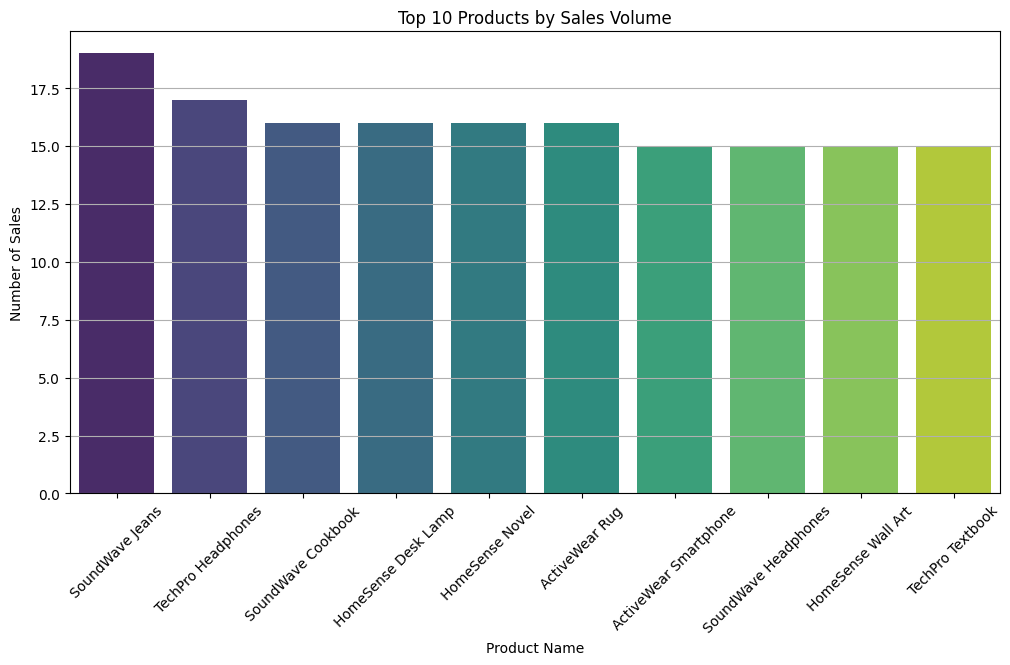

C:\Users\User\AppData\Local\Temp\ipykernel_28236\3815996456.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='SalesVolume', data=category_sales, palette='magma')


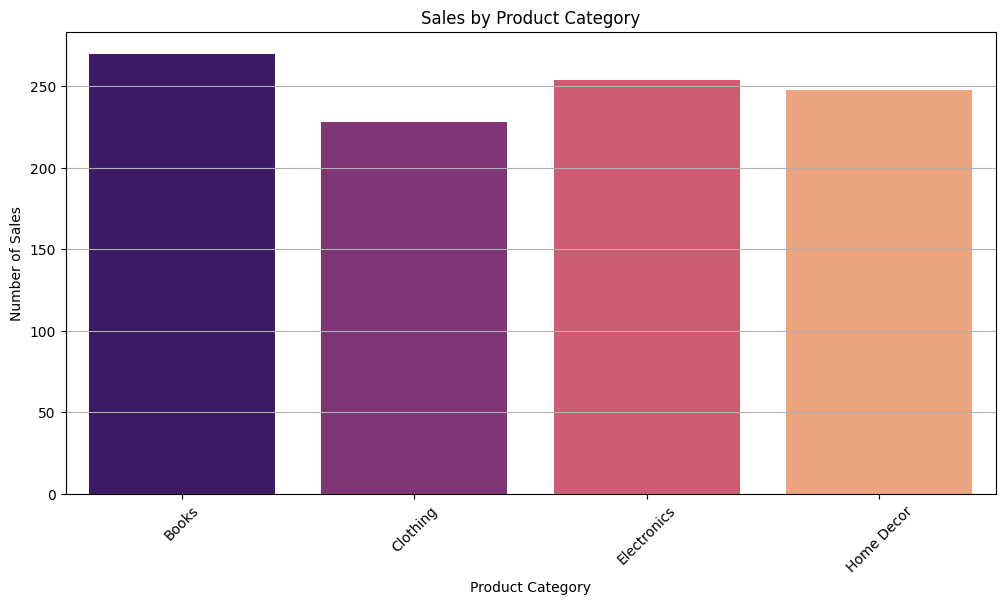

Sales by Product Category:
       Category  SalesVolume
0        Books          270
1     Clothing          228
2  Electronics          254
3   Home Decor          248


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
products = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Products.csv')
transactions = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Transactions.csv')

# Display the first few rows of the datasets to understand their structure
print(products.head())
print(transactions.head())

# Check for missing values in the 'ProductID' column
print(transactions['ProductID'].isnull().sum())

# If there are missing values, you can choose to fill or drop them
# For example, dropping rows with missing ProductID values
transactions.dropna(subset=['ProductID'], inplace=True)

# 1. Product Popularity
# Count the number of sales for each product
product_sales = transactions['ProductID'].value_counts()

# Merge product sales with product details
product_sales_df = pd.DataFrame(product_sales).reset_index()
product_sales_df.columns = ['ProductID', 'SalesVolume']

# Merge with products to get product names and categories
merged_data = product_sales_df.merge(products, on='ProductID')

# Display the top 10 products by sales volume
top_products = merged_data.nlargest(10, 'SalesVolume')
print("Top 10 Products by Sales Volume:\n", top_products[['ProductName', 'SalesVolume']])

# Plotting the top 10 products by sales volume
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products['ProductName'], y=top_products['SalesVolume'], palette='viridis')
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.grid(axis='y')
plt.show()

# 2. Sales by Product Category
# Count sales by product category
category_sales = merged_data.groupby('Category')['SalesVolume'].sum().reset_index()

# Plotting sales by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='SalesVolume', data=category_sales, palette='magma')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.grid(axis='y')
plt.show()

# Insight: Identify which product categories are the most popular
print("Sales by Product Category:\n", category_sales)

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
0
Percentage of Repeat Customers: 93.97%


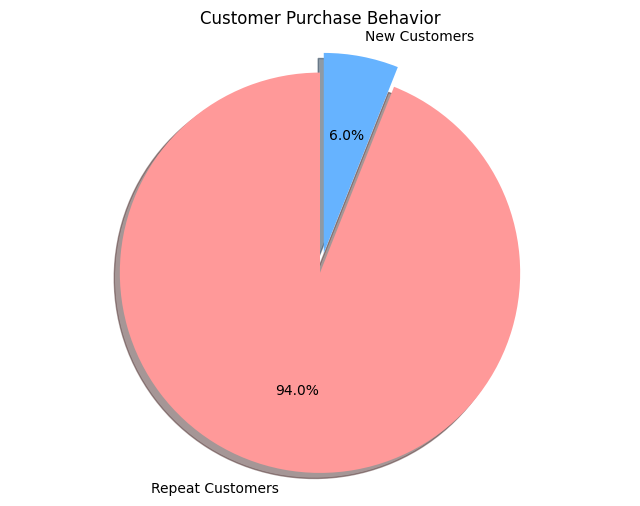

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Transactions dataset
transactions = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Transactions.csv')

# Display the first few rows of the dataset to understand its structure
print(transactions.head())

# Check for missing values in the 'CustomerID' column
print(transactions['CustomerID'].isnull().sum())

# If there are missing values, you can choose to fill or drop them
# For example, dropping rows with missing CustomerID values
transactions.dropna(subset=['CustomerID'], inplace=True)

# Count the number of purchases per customer
customer_purchase_counts = transactions['CustomerID'].value_counts()

# Calculate the number of repeat customers
repeat_customers_count = customer_purchase_counts[customer_purchase_counts > 1].count()
total_customers_count = customer_purchase_counts.count()

# Calculate the percentage of repeat customers
repeat_purchase_rate = (repeat_customers_count / total_customers_count) * 100

# Print the percentage of repeat customers
print(f"Percentage of Repeat Customers: {repeat_purchase_rate:.2f}%")

# Visualization of repeat vs. non-repeat customers
labels = ['Repeat Customers', 'New Customers']
sizes = [repeat_customers_count, total_customers_count - repeat_customers_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Repeat Customers)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customer Purchase Behavior')
plt.show()

# Insight: Analyze the percentage of customers who make repeat purchases.

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

# Load datasets
customers = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Customers.csv')
products = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Products.csv')
transactions = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Transactions.csv')

# Debug: Check column names
print("Transactions columns:", transactions.columns)
print("Customers columns:", customers.columns)
print("Products columns:", products.columns)

# Merge datasets to create a comprehensive dataset
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, products, on='ProductID')

# Debug: Check merged data
print("Merged data columns:", data.columns)
print(data.head())

# Verify if 'Price' exists
if 'Price' not in data.columns:
    raise KeyError("'Price' column is missing in the merged dataset. Check the Products.csv file or column names.")

# Feature engineering: Create relevant features
data['TotalSpend'] = data['Quantity'] * data['Price']
customer_features = data.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'TransactionID': 'count',
    'Region': 'first'  # Assuming Region is constant for each customer
}).reset_index()

# Rename columns for clarity
customer_features.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)

# One-hot encode the 'Region' column
customer_features = pd.get_dummies(customer_features, columns=['Region'])

# Prepare features for modeling
X = customer_features.drop('CustomerID', axis=1)

# Fit the KNN model
knn = NearestNeighbors(n_neighbors=3)
knn.fit(X)

# Function to recommend similar customers
def recommend_similar_customers(user_data):
    distances, indices = knn.kneighbors(user_data)
    return distances, indices

# Example user data for recommendation (TotalSpend, TransactionCount, Region_1, Region_2, ...)
user_data = [[500, 10, 1, 0, 0]]  # Adjust based on your one-hot encoding
distances, recommended_indices = recommend_similar_customers(user_data)

# Output recommended customers
recommended_customers = customer_features.iloc[recommended_indices[0]].copy()
recommended_customers['SimilarityScore'] = 1 / (distances[0] + 1e-5)  # Avoid division by zero

# Display recommended customers with similarity scores
print(recommended_customers[['CustomerID', 'TotalSpend', 'TransactionCount', 'SimilarityScore']])


Transactions columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
Customers columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Products columns: Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Merged data columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10

KeyError: "'Price' column is missing in the merged dataset. Check the Products.csv file or column names."

Davies-Bouldin Index: 0.80


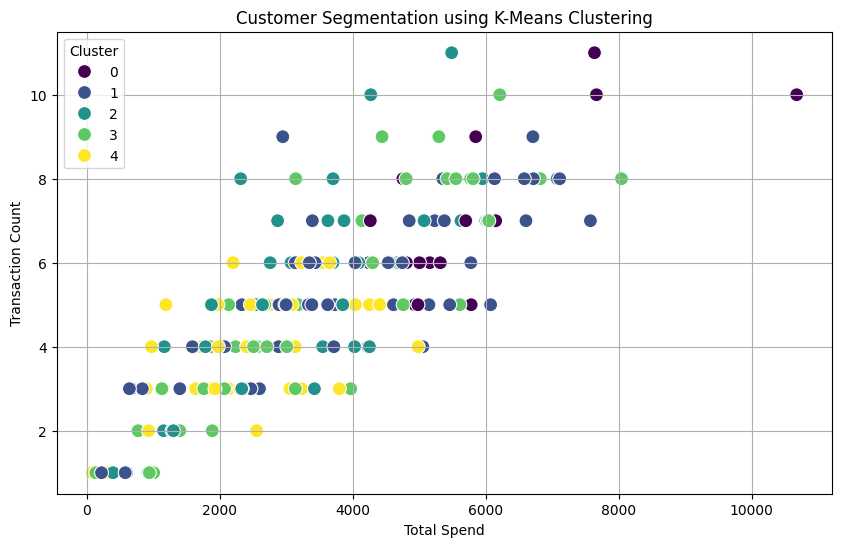

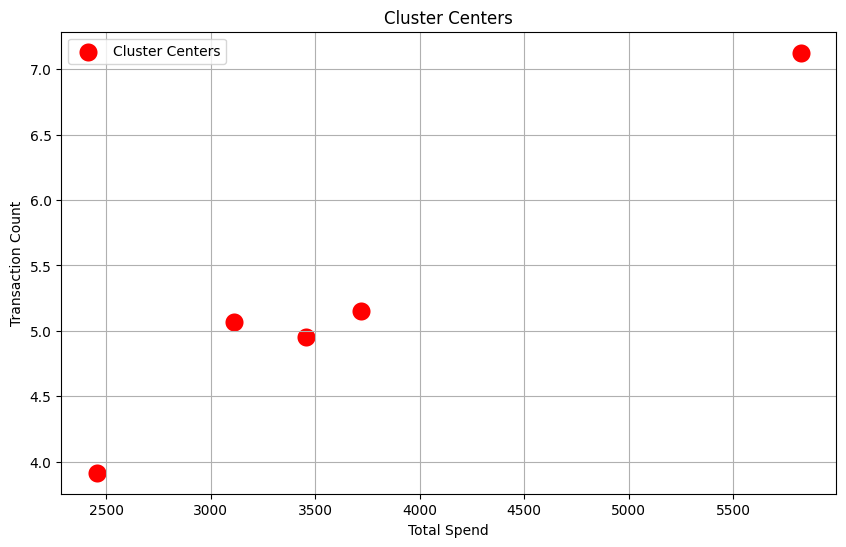

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Load datasets
customers = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Customers.csv')
transactions = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\eCommerce_Analysis\data\Transactions.csv')

# Merge datasets to create a comprehensive dataset
data = pd.merge(transactions, customers, on='CustomerID')

# Feature engineering: Create relevant features
data['TotalSpend'] = data['Quantity'] * data['Price']
customer_features = data.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'TransactionID': 'count',
    'Region': 'first'  # Assuming Region is constant for each customer
}).reset_index()

# Rename columns for clarity
customer_features.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)

# One-hot encode the 'Region' column
customer_features = pd.get_dummies(customer_features, columns=['Region'])

# Prepare features for clustering
X = customer_features.drop('CustomerID', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (between 2 and 10)
n_clusters = 5  # You can change this value

# Fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.2f}')

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features['TotalSpend'], y=customer_features['TransactionCount'], 
                hue=customer_features['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Optional: Visualize cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red', s=200, label='Cluster Centers')
plt.title('Cluster Centers')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.legend()
plt.grid()
plt.show()